**Import Libaries**

In [ ]:
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

**Task 1: Data set**

Shuffling and writing examples to /root/tensorflow_datasets/malaria/1.0.0.incompleteMJ7O9R/malaria-train.tfrecord


Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


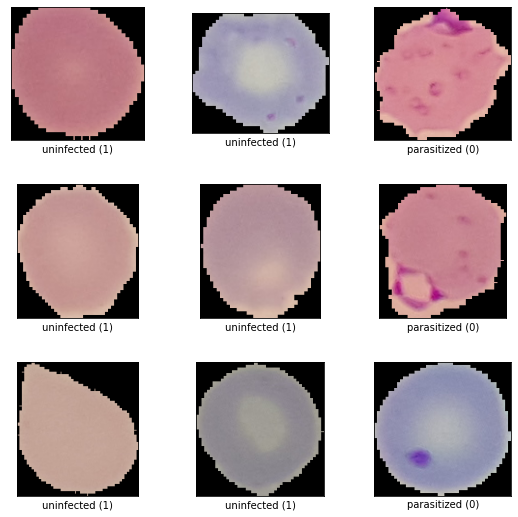

In [ ]:
# Description: First, the malaria data set is loaded as a 2-tupel (image and label). 
#              We also used the show_example function to check, if the dataset is load properly and to get an insight into the images we are working with.

raw_dataset, raw_data_info = tfds.load('Malaria', split='train', as_supervised = True, with_info = True)

fig = tfds.show_examples(raw_dataset, raw_data_info)

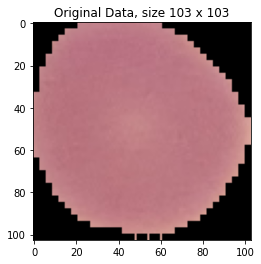

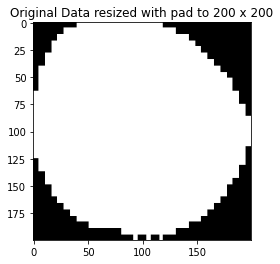

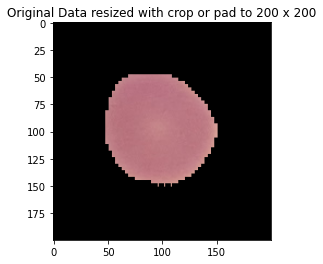

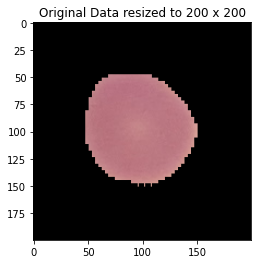

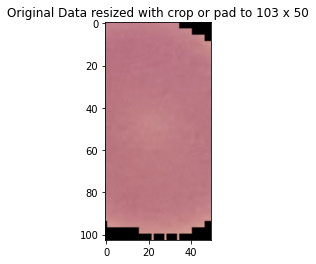

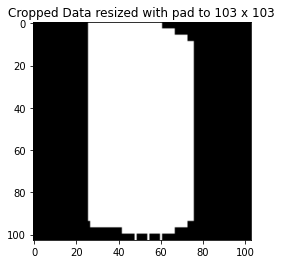

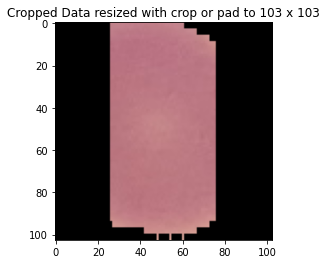

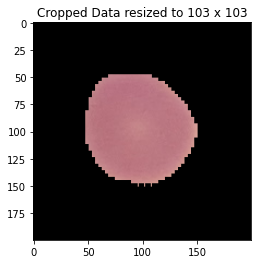

In [ ]:
# Description: This is an example to show how the functions resize_with_pad and resize_with_crop_or_pad are working. 
#              If the shape is not a quadratic shape the image is filled up with zero (black) space to the shape given to the function.
#              'resize_with_pad' turn the color image into a black and white image. (height x width x 1)
#              'resize_with_crop_or_pad' and 'resize' resizes the image without loosing the color information. (height x width x 3)
#              Moreover, resize_with_pad streches the image if it's already in a quadratic format otherwise it fills up with zeros (black), and additionally the image is clipping.
#              If the picture was cropped before, only te function 'resize', creates the original image again.

for data in raw_dataset:
  plt.title('Original Data, size 103 x 103')
  plt.imshow(data[0].numpy())
  plt.show()

  plt.title('Original Data resized with pad to 200 x 200')
  data_pad = tf.image.resize_with_pad(data[0], 200, 200)
  plt.imshow(data_pad.numpy())
  plt.show()

  plt.title('Original Data resized with crop or pad to 200 x 200')
  data_crop_pad = tf.image.resize_with_crop_or_pad(data[0], 200, 200)
  plt.imshow(data_crop_pad.numpy())
  plt.show()

  plt.title('Original Data resized to 200 x 200')
  data_resized = tf.image.resize(data[0], [200, 200])
  plt.imshow(data_crop_pad.numpy())
  plt.show()

  plt.title('Original Data resized with crop or pad to 103 x 50')
  data_crop = tf.image.resize_with_crop_or_pad(data[0], 103, 50)
  plt.imshow(data_crop.numpy())
  plt.show()

  plt.title('Cropped Data resized with pad to 103 x 103')
  data_repad = tf.image.resize_with_pad(data_crop, 103, 103)
  plt.imshow(data_repad.numpy())
  plt.show()

  plt.title('Cropped Data resized with crop or pad to 103 x 103')
  data_crop_repad = tf.image.resize_with_crop_or_pad(data_crop, 103, 103)
  plt.imshow(data_crop_repad.numpy())
  plt.show()

  plt.title('Cropped Data resized to 103 x 103')
  data_resized = tf.image.resize(data_crop, [103, 103])
  plt.imshow(data_crop_pad.numpy())
  plt.show()
  
  break


In [ ]:
# Description: Determines the maximum height and width of all images in the dataset.
#              Depending on this, the larger size is used as the edge length to get a square image.

def get_biggest_edge_length(dataset):
  max_img_height = 0           
  max_img_width = 0
  for (input, target) in dataset:      
    img_shape = input.shape
    if img_shape[0] > max_img_height: 
      max_img_height = img_shape[0]
    if img_shape[1] > max_img_width: 
      max_img_width = img_shape[1]   
  if max_img_width > max_img_height:
    edge_length = max_img_width
  else:
    edge_length = max_img_height
  return edge_length

[16720 26138 14576 10605  5337 16338  7867 15460  8600 23219]


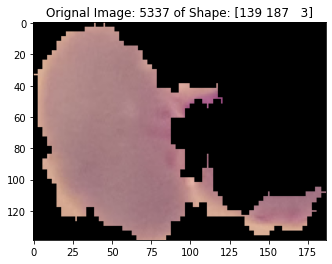

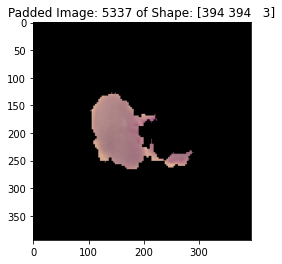

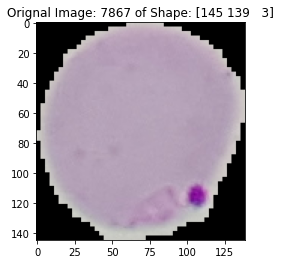

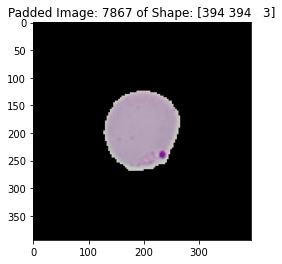

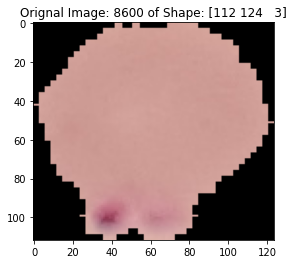

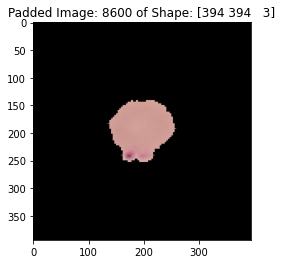

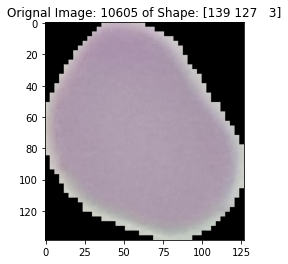

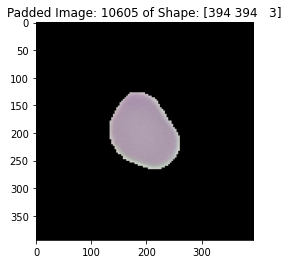

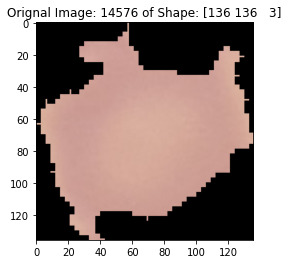

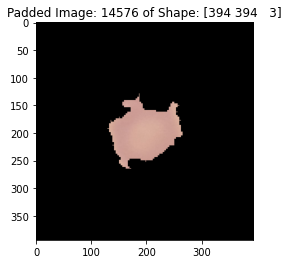

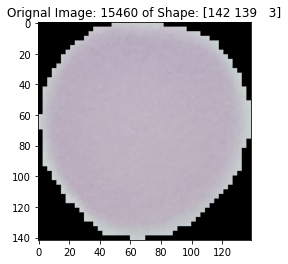

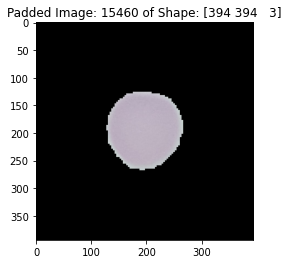

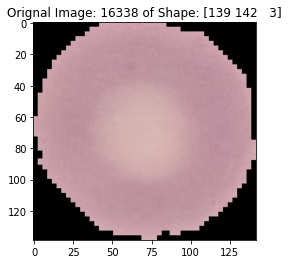

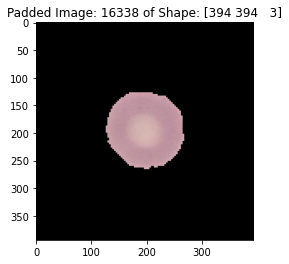

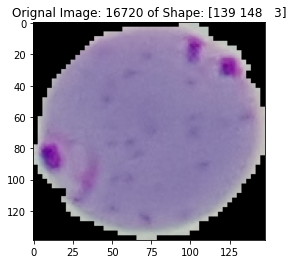

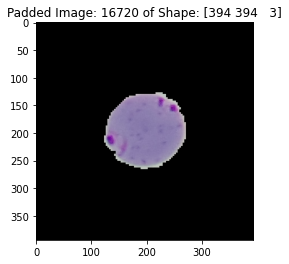

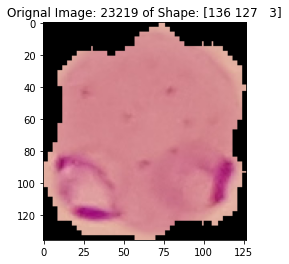

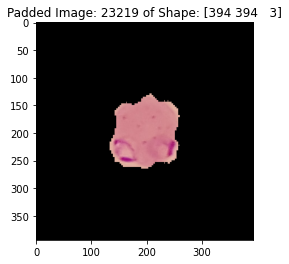

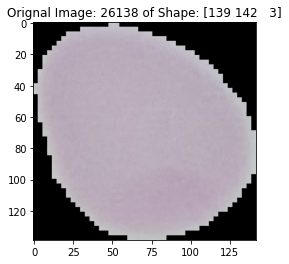

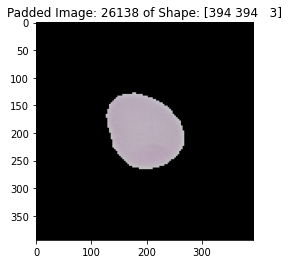

In [ ]:
# Description: We printed 10 different images with their shapes displaying in the title. The images are randomly choosen from the complete dataset.
#              What we can see is that the image are not presented in the same size, moreover the data is not present in a quadratic form.
#              Because the feature (the cell) is represented on black background, which is not relevant for the problem, we choose Zero-Padding to reshape the images. Therefore we use the function resize from tensorflow libary.
#              Givin the results from our test before, we choose to use resize_with_crop_or_pad in our code.

edge_length = get_biggest_edge_length(raw_dataset)
padded_images = raw_dataset.map(lambda inp, tar: tf.image.resize(inp, [edge_length, edge_length]))

data_index = np.random.randint(0, high = len(raw_dataset), size = 10)
print(data_index)

index = 0
for data in raw_dataset:
  if(np.any(data_index == index)):
    img = data[0]
    image_shape = np.array(img.shape)
    plt.title('Orignal Image: ' + str(index) + ' of Shape: ' + str(image_shape))
    plt.imshow(img.numpy())
    plt.show()

    pad_index = 0
    for pad_data in padded_images:
      if(pad_index == index):
        pad_img = pad_data[0]
        pad_image_shape = np.array(pad_img.shape)
        plt.title('Padded Image: ' + str(pad_index) + ' of Shape: ' + str(pad_image_shape))
        plt.imshow(pad_img.numpy())
        plt.show()
      pad_index = pad_index + 1

  index = index + 1

